In [16]:
import keras
from keras.api import layers
from keras.api.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import sys
# sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

In [36]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"

INPUT_SHAPE = (64, 64)
CLASSES = 43

EPOCHS = 20

Loading Files and Dataset ...
Found Categories : ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


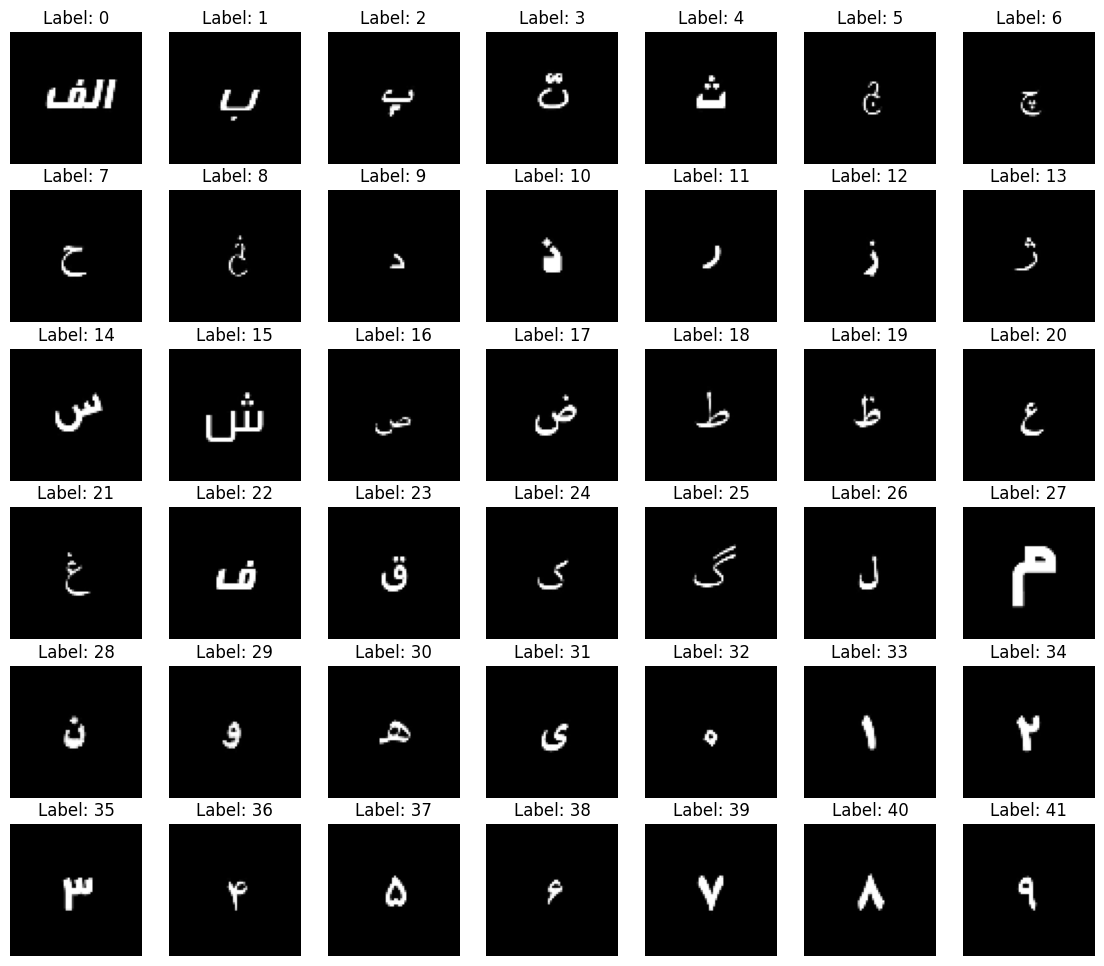

In [37]:
dataloader = DataLoader(path=DATASET1, image_size=INPUT_SHAPE[0], padding=0, invert=True)
X, y = dataloader.load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [38]:
model_1 = Sequential(name='Model-1')

model_1.add(layers.Input(shape=INPUT_SHAPE))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=2048, activation='relu', use_bias=True, name='Dense_1'))
model_1.add(layers.Dense(units=1024, activation='relu', use_bias=True, name='Dense_2'))
model_1.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_3'))
model_1.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_4'))
model_1.add(layers.Dense(units=128, activation='relu', use_bias=True, name='Dense_5'))
model_1.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_6'))
model_1.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_7'))

model_1.summary()

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_7 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,188,907 (42.68 MB)

 Trainable params: 11,188,907 (42.68 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_1.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

history_df_1 = pd.DataFrame({
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})

model_1.save(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_1)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9683 - loss: 0.0945 - val_accuracy: 0.8419 - val_loss: 1.3771
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9713 - loss: 0.0864 - val_accuracy: 0.8523 - val_loss: 1.2432
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9854 - loss: 0.0402 - val_accuracy: 0.8372 - val_loss: 1.5449
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9708 - loss: 0.0998 - val_accuracy: 0.8488 - val_loss: 1.4802
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9356 - loss: 0.2303 - val_accuracy: 0.8488 - val_loss: 1.3433
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9925 - loss: 0.0265 - val_accuracy: 0.8477 - val_loss: 1.4100
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9961 - loss: 0.0146 - val_accuracy: 0.8558 - val_loss: 1.4518
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9709 - loss: 0.0776 - val_accu

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,0.958418,0.841860,0.117232,1.377104
1,0.975865,0.852326,0.067938,1.243190
2,0.983425,0.837209,0.048336,1.544927
3,0.978191,0.848837,0.070559,1.480206
4,0.948241,0.848837,0.167762,1.343257
5,0.993312,0.847674,0.023637,1.409994
6,0.993894,0.855814,0.019143,1.451829
7,0.963652,0.786047,0.103561,1.610011
8,0.921198,0.769767,0.278397,1.509452
9,0.976737,0.846512,0.072182,1.477690


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


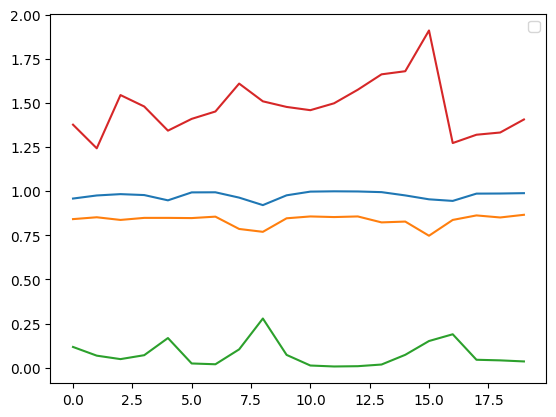

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8711 - loss: 1.5534
Model 1 Test Accuracy: 0.8663
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


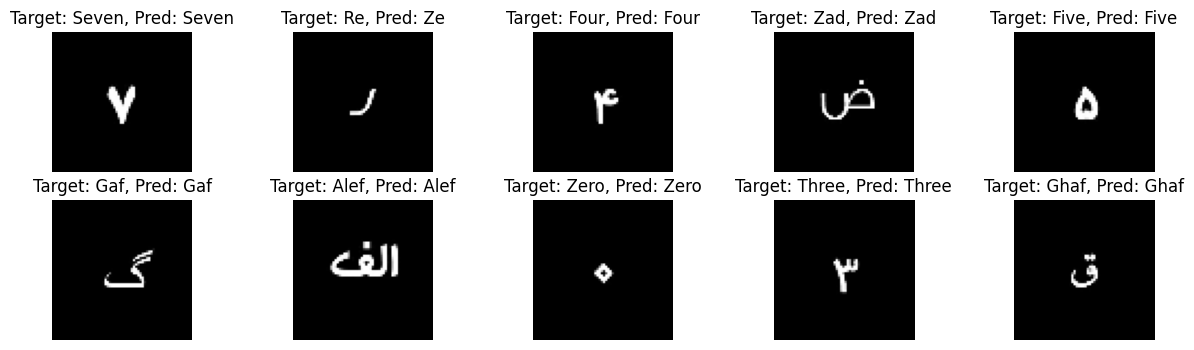

In [47]:
from keras.api.models import load_model

plt.plot(history_df_1)
plt.legend()
plt.show()


test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc_1:.4f}')

loaded_model = load_model(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{test_acc_1:.4f}_val_acc.keras")

predictions = loaded_model.predict(X_test)

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions[i])]}')
    plt.axis('off')
    counter+=1
plt.show()

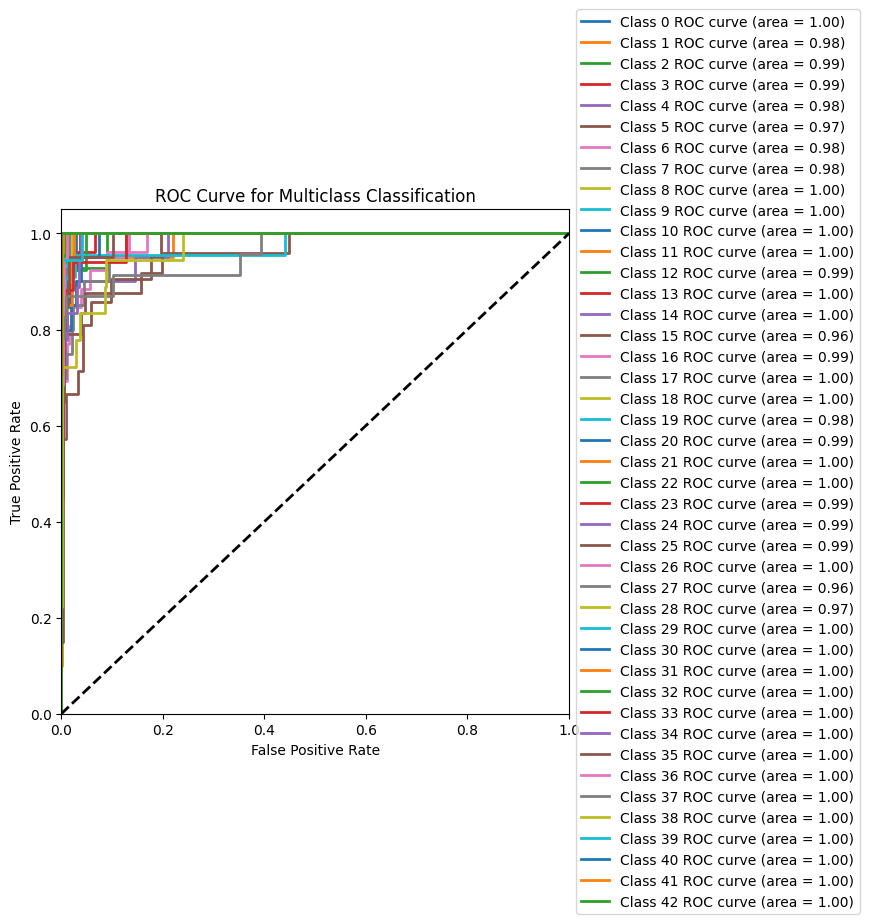

In [53]:
from keras.api.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(CLASSES):
    ax.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Multiclass Classification')

plt.tight_layout(rect=[0, 0, 0.75, 1])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()